### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
missing_counts = data.isnull().sum().sort_values(ascending=False)
categorical_cols = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].unique()[:10] for col in categorical_cols}

missing_counts

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
weather                     0
temperature                 0
destination                 0
passanger                   0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
income                      0
occupation                  0
has_children                0
education                   0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
data = data.drop(columns=["car"])

data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [12]:
acceptance_rate = data["Y"].mean()

print(f"Acceptance Rate: {acceptance_rate:.2%}")

Acceptance Rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

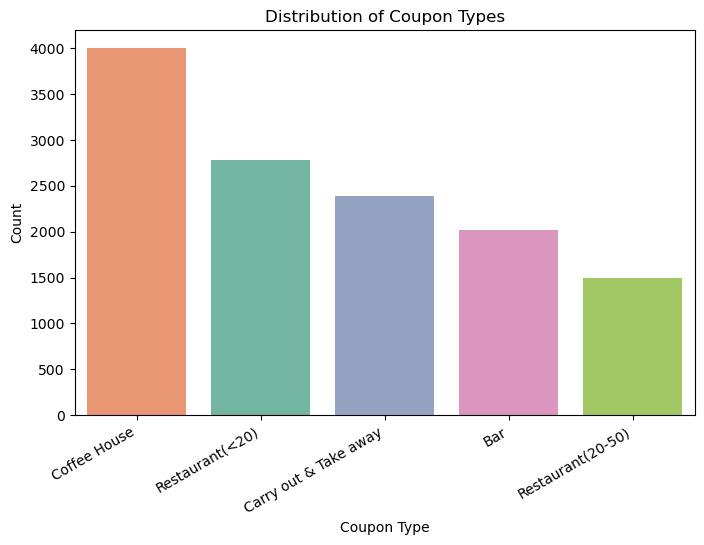

In [16]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=data, 
    x="coupon", 
    hue="coupon",  
    order=data["coupon"].value_counts().index, 
    palette="Set2", 
    legend=False   
)

plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")

plt.show()

6. Use a histogram to visualize the temperature column.

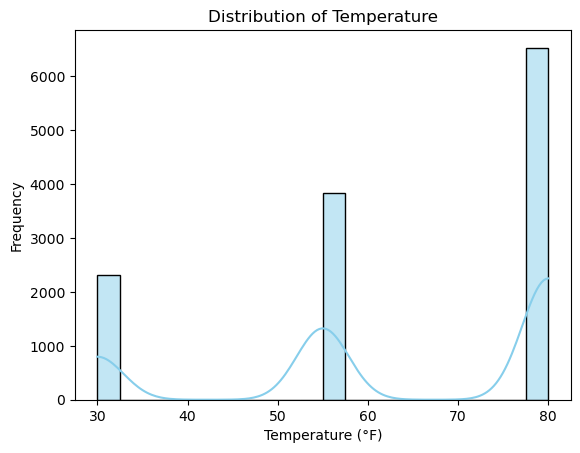

In [18]:
sns.histplot(data=data, x="temperature", bins=20, kde=True, color="skyblue")

plt.title("Distribution of Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
bar_data = data[data["coupon"] == "Bar"].copy()

bar_data.shape, bar_data.head()

((2017, 25),
         destination  passanger weather  temperature  time coupon expiration  \
 9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
 13             Home      Alone   Sunny           55   6PM    Bar         1d   
 17             Work      Alone   Sunny           55   7AM    Bar         1d   
 24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
 35             Home      Alone   Sunny           55   6PM    Bar         1d   
 
     gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
 9   Female  21  Unmarried partner  ...        never       NaN   
 13  Female  21  Unmarried partner  ...        never       NaN   
 17  Female  21  Unmarried partner  ...        never       NaN   
 24    Male  21             Single  ...        less1       4~8   
 35    Male  21             Single  ...        less1       4~8   
 
    RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
 9                   4~8   

2. What proportion of bar coupons were accepted?


In [20]:
acceptance_rate = bar_data["Y"].mean()

print(f"Acceptance Rate: {acceptance_rate:.2%}")

Acceptance Rate: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
def bar_frequency(val):
    if val in ["never", "less1"]:
        return 0
    elif val == "1~3":
        return 2  # midpoint
    elif val == "4~8":
        return 6
    elif val == "gt8":
        return 9
    else:
        return None

bar_data["bar_visits"] = bar_data["Bar"].map(bar_frequency)


bar_data["bar_group"] = bar_data["bar_visits"].apply(lambda x: "≤3 times" if x is not None and x <= 3 else (">3 times" if x is not None else None))

acceptance_by_bar_group = bar_data.groupby("bar_group")["Y"].mean()
acceptance_by_bar_group


bar_group
>3 times    0.731818
≤3 times    0.370618
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
def age_to_num(val):
    if val == "below21":
        return 20
    elif val == "50plus":
        return 55
    else:
        try:
            return int(val)
        except:
            return None

bar_data["age_num"] = bar_data["age"].map(age_to_num)


bar_data["bar_age_group"] = bar_data.apply(lambda row: "Bar>1 & Age>25" if (row["bar_visits"] is not None and row["bar_visits"] > 1 and row["age_num"] > 25)
    else "All others",
    axis=1
)

acceptance_by_group = bar_data.groupby("bar_age_group")["Y"].mean()
acceptance_by_group


bar_age_group
All others        0.335003
Bar>1 & Age>25    0.695238
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [23]:
excluded_occupations = ["Farming Fishing & Forestry"]

bar_data["bar_pass_occ_group"] = bar_data.apply(
    lambda row: "Bar>1 & NoKids & NotFFF" 
    if (row["bar_visits"] is not None and row["bar_visits"] > 1 
        and row["passanger"] != "Kid(s)" 
        and row["occupation"] not in excluded_occupations)
    else "All others",
    axis=1
)

# Calculate acceptance rates
acceptance_by_pass_occ = bar_data.groupby("bar_pass_occ_group")["Y"].mean()
acceptance_by_pass_occ

bar_pass_occ_group
All others                 0.296044
Bar>1 & NoKids & NotFFF    0.713249
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [24]:
def freq_to_num(val):
    if val == "never":
        return 0
    elif val == "less1":
        return 0.5
    elif val == "1~3":
        return 2
    elif val == "4~8":
        return 6
    elif val == "gt8":
        return 9
    else:
        return None

bar_data["cheap_restaurants"] = bar_data["RestaurantLessThan20"].map(freq_to_num)

income_map = {
    "Less than $12500": 6250,
    "$12500 - $24999": 18750,
    "$25000 - $37499": 31250,
    "$37500 - $49999": 43750,
    "$50000 - $62499": 56250,
    "$62500 - $74999": 68750,
    "$75000 - $87499": 81250,
    "$87500 - $99999": 93750,
    "$100000 or More": 100000
}
bar_data["income_num"] = bar_data["income"].map(income_map)


def group_conditions(row):
    cond1 = (row["bar_visits"] is not None and row["bar_visits"] > 1 and 
             row["passanger"] != "Kid(s)" and row["maritalStatus"] != "Widowed")
    cond2 = (row["bar_visits"] is not None and row["bar_visits"] > 1 and row["age_num"] < 30)
    cond3 = (row["cheap_restaurants"] is not None and row["cheap_restaurants"] > 4 and row["income_num"] < 50000)
    
    if cond1 or cond2 or cond3:
        return "Condition Group"
    else:
        return "All others"

bar_data["complex_group"] = bar_data.apply(group_conditions, axis=1)

# Calculate acceptance rates
acceptance_by_complex_group = bar_data.groupby("complex_group")["Y"].mean()
acceptance_by_complex_group


complex_group
All others         0.298147
Condition Group    0.588918
Name: Y, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
They are frequent bar-goers.

Acceptance jumps from ~37% (occasional/non-drinkers) to ~73% for people who go more than 3 times per month.

In other words, bar coupons only work on people already predisposed to that lifestyle.

They skew older than 25.

Drivers over 25 who also go to bars often are much more receptive (~69.5% acceptance).

Suggests that bar coupon takers are not young casual drinkers but more consistent, older patrons.

They usually don’t have kids in the car and aren’t widowed.

Having passengers who are not kids (and not being widowed) correlates with acceptance over 70%.

Implies that social/leisure contexts (friends/partners) are more compatible with bar coupon redemption.

Occupation/income/lifestyle factors matter.

Those outside farming/fishing/forestry jobs redeem at higher rates.

Also, people who go to cheap restaurants often and earn <50K were more likely to take the coupon (budget-conscious, social, frequent diners).

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [25]:
coffee_data = data[data["coupon"] == "Coffee House"].copy()
print(coffee_data.shape)
coffee_data.head()

(3996, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [26]:
coffee_acceptance_rate = coffee_data["Y"].mean()
print(f"Coffee House coupon acceptance rate: {coffee_acceptance_rate:.2%}")


Coffee House coupon acceptance rate: 49.92%


In [28]:
# Subset data for Coffee House coupons
coffee_data = data[data["coupon"] == "Coffee House"].copy()

# Overall acceptance rate
coffee_acceptance_rate = coffee_data["Y"].mean()

# Compare acceptance by visit frequency
acceptance_by_visits = coffee_data.groupby("CoffeeHouse")["Y"].mean().sort_values(ascending=False)

# Compare acceptance by passenger type
acceptance_by_passenger = coffee_data.groupby("passanger")["Y"].mean().sort_values(ascending=False)

# Compare acceptance by age
acceptance_by_age = coffee_data.groupby("age")["Y"].mean().sort_values(ascending=False)

# Compare acceptance by income
acceptance_by_income = coffee_data.groupby("income")["Y"].mean().sort_values(ascending=False)

In [29]:
coffee_acceptance_rate, acceptance_by_visits, acceptance_by_passenger, acceptance_by_age, acceptance_by_income

(np.float64(0.49924924924924924),
 CoffeeHouse
 4~8      0.685874
 gt8      0.657895
 1~3      0.647793
 less1    0.481860
 never    0.188781
 Name: Y, dtype: float64,
 passanger
 Friend(s)    0.596906
 Partner      0.570492
 Kid(s)       0.483092
 Alone        0.437943
 Name: Y, dtype: float64,
 age
 below21    0.696774
 21         0.524349
 26         0.514828
 46         0.513636
 41         0.501538
 31         0.476726
 36         0.467662
 50plus     0.420183
 Name: Y, dtype: float64,
 income
 $87500 - $99999     0.557196
 Less than $12500    0.551948
 $37500 - $49999     0.542373
 $12500 - $24999     0.540404
 $50000 - $62499     0.503650
 $100000 or More     0.494382
 $25000 - $37499     0.473438
 $62500 - $74999     0.436364
 $75000 - $87499     0.296610
 Name: Y, dtype: float64)